In [31]:
import papermill as pm
import scrapbook as sb
import pandas as pd
from datetime import datetime, timedelta
import os

In [32]:
connection_string = 'sqlite:///data.db'
prices = pd.read_sql(f'''
SELECT 
    * 
FROM ohlc
''', connection_string)

prices['ts'] = pd.to_datetime(prices['ts'])
prices.set_index('ts', inplace=True)
prices = prices.sort_index()

In [54]:
run_dates = [(datetime(2021, 12, 1) + timedelta(days=7 * x)) for x in range(2)]
tokens = prices['token'].unique()

In [34]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [55]:
for run_date in run_dates:
    for token in tokens:
        print(f'running for {token} for date {run_date} to {run_date + timedelta(days=7)}', end='\r')
        res = pm.execute_notebook(
            'market_analysis.ipynb',
            f'{base_output_folder}/market_analysis_{token}_{str(run_date)[:-9]}.ipynb',
            parameters = {
                'from_date': f'{run_date}',
                'to_date': f'{run_date + timedelta(days=7)}',
                'token': token,
                'connection_string': connection_string,
            }
        )

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

Executing:   0%|          | 0/16 [00:00<?, ?cell/s]

In [56]:
nbs = sb.read_notebooks('outputs')

In [61]:
total_result = pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'ret': scrap['prices'].data.ret.mean(),
        'volatility': scrap['prices'].data.volatility.mean(),
        'maxdown': scrap['prices'].data.maxdown.max(),
        'spread': scrap['prices'].data.close[-1]-scrap['prices'].data.close[0]}) 
    for book, scrap in nbs.notebook_scraps.items()
])
total_result.sort_values(by=['from_date'])

,token,from_date,to_date,ret,volatility,maxdown,spread
0,AAVE,2021-12-01 00:00:00,2021-12-08 00:00:00,-2.000152e-03,0.242483,98.3490,-73.0010
18,SOL,2021-12-01 00:00:00,2021-12-08 00:00:00,-5.735123e-04,0.303516,63.2820,-19.0590
16,ETH,2021-12-01 00:00:00,2021-12-08 00:00:00,-4.870219e-04,0.196912,897.7300,-362.0500
14,DOT,2021-12-01 00:00:00,2021-12-08 00:00:00,-1.492435e-03,0.282046,13.2990,-8.3790
12,CRV,2021-12-01 00:00:00,2021-12-08 00:00:00,-1.365878e-03,0.388226,2.1302,-1.0258
20,USDT,2021-12-01 00:00:00,2021-12-08 00:00:00,-5.983536e-07,0.017971,0.0047,-0.0001
8,BTC,2021-12-01 00:00:00,2021-12-08 00:00:00,-7.491980e-04,0.183768,12075.7400,-6702.1000
10,COMP,2021-12-01 00:00:00,2021-12-08 00:00:00,-1.404797e-03,0.244058,87.9300,-58.2800
6,AVAX,2021-12-01 00:00:00,2021-12-08 00:00:00,-1.890629e-03,0.336614,49.0300,-32.8200
4,ATOM,2021-12-01 00:00:00,2021-12-08 00:00:00,-8.498561e-04,0.374788,10.5430,-3.6450


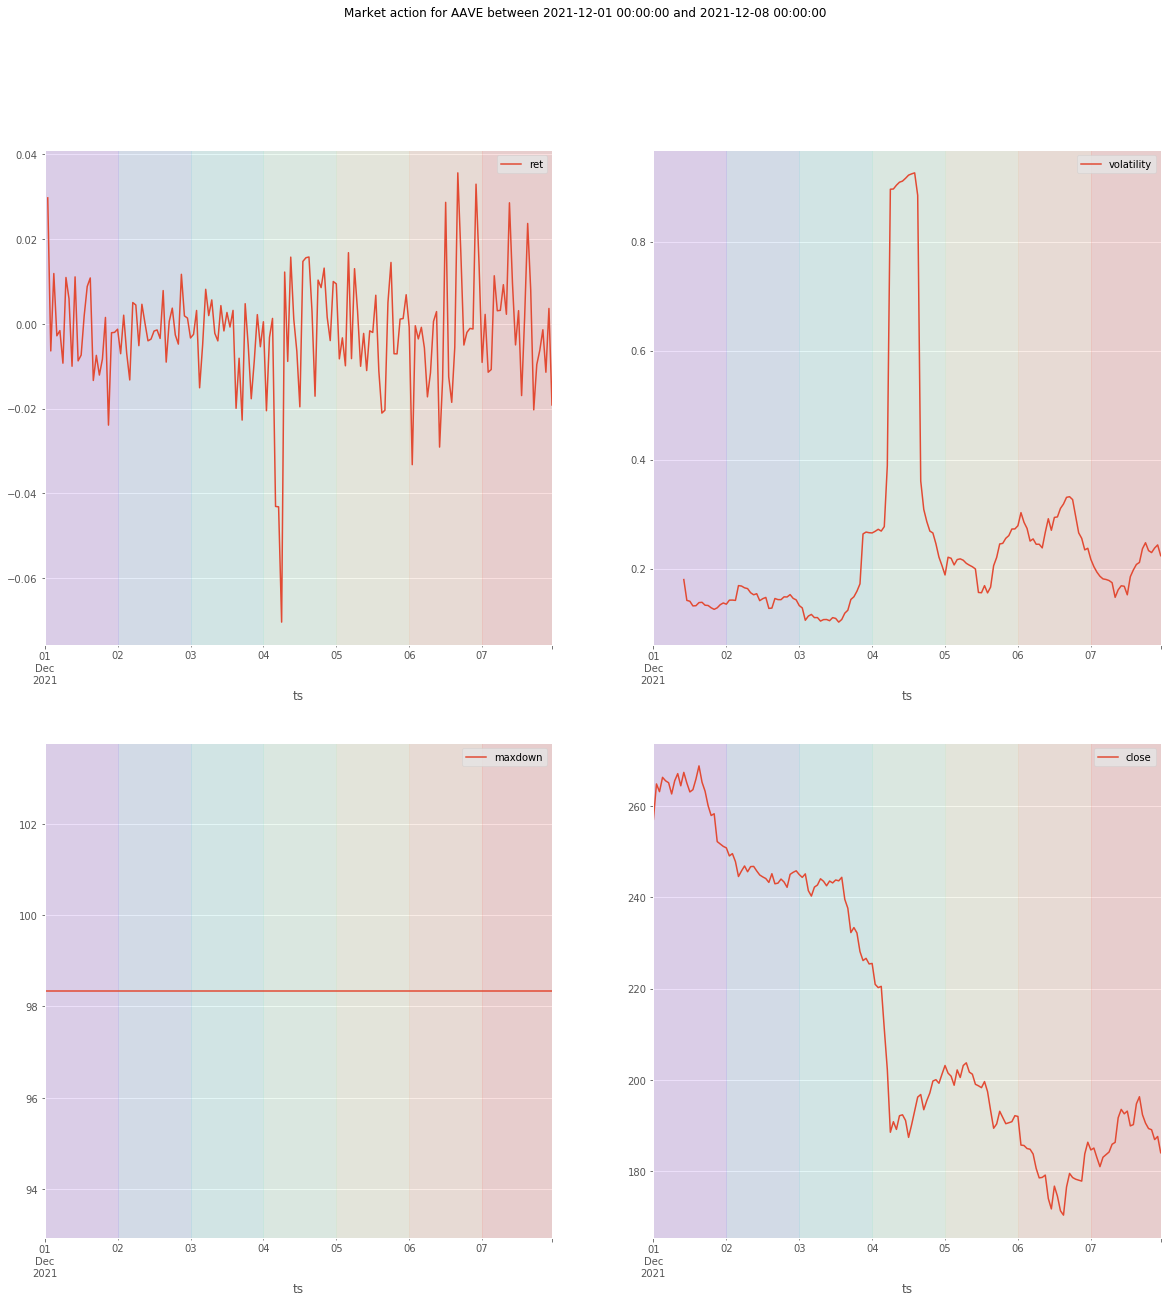

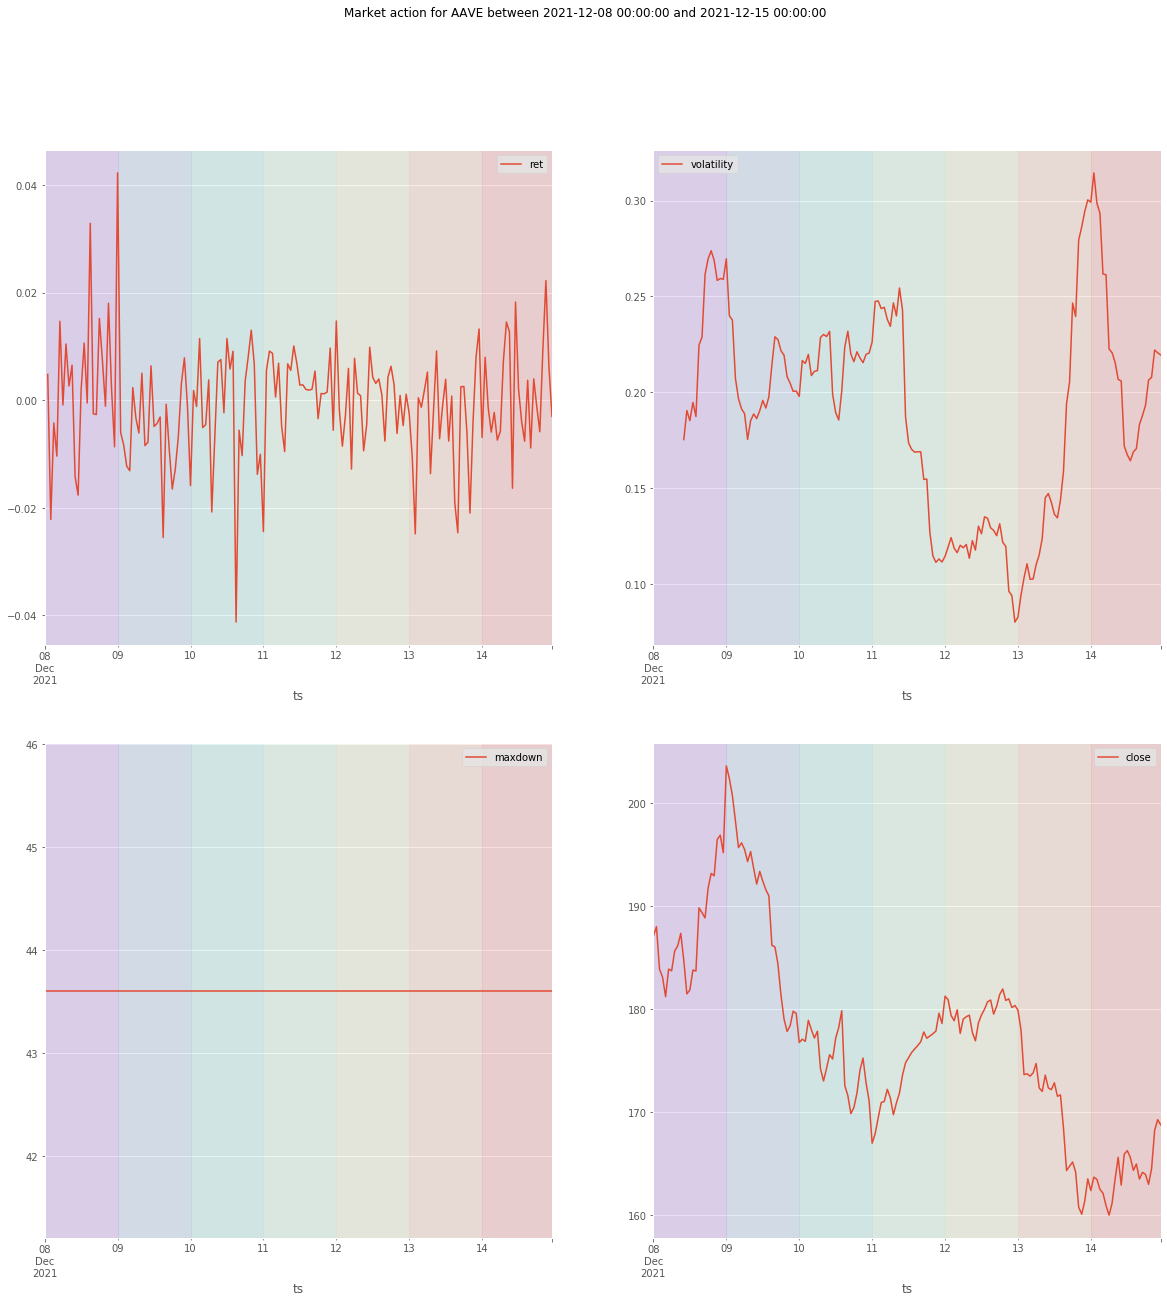

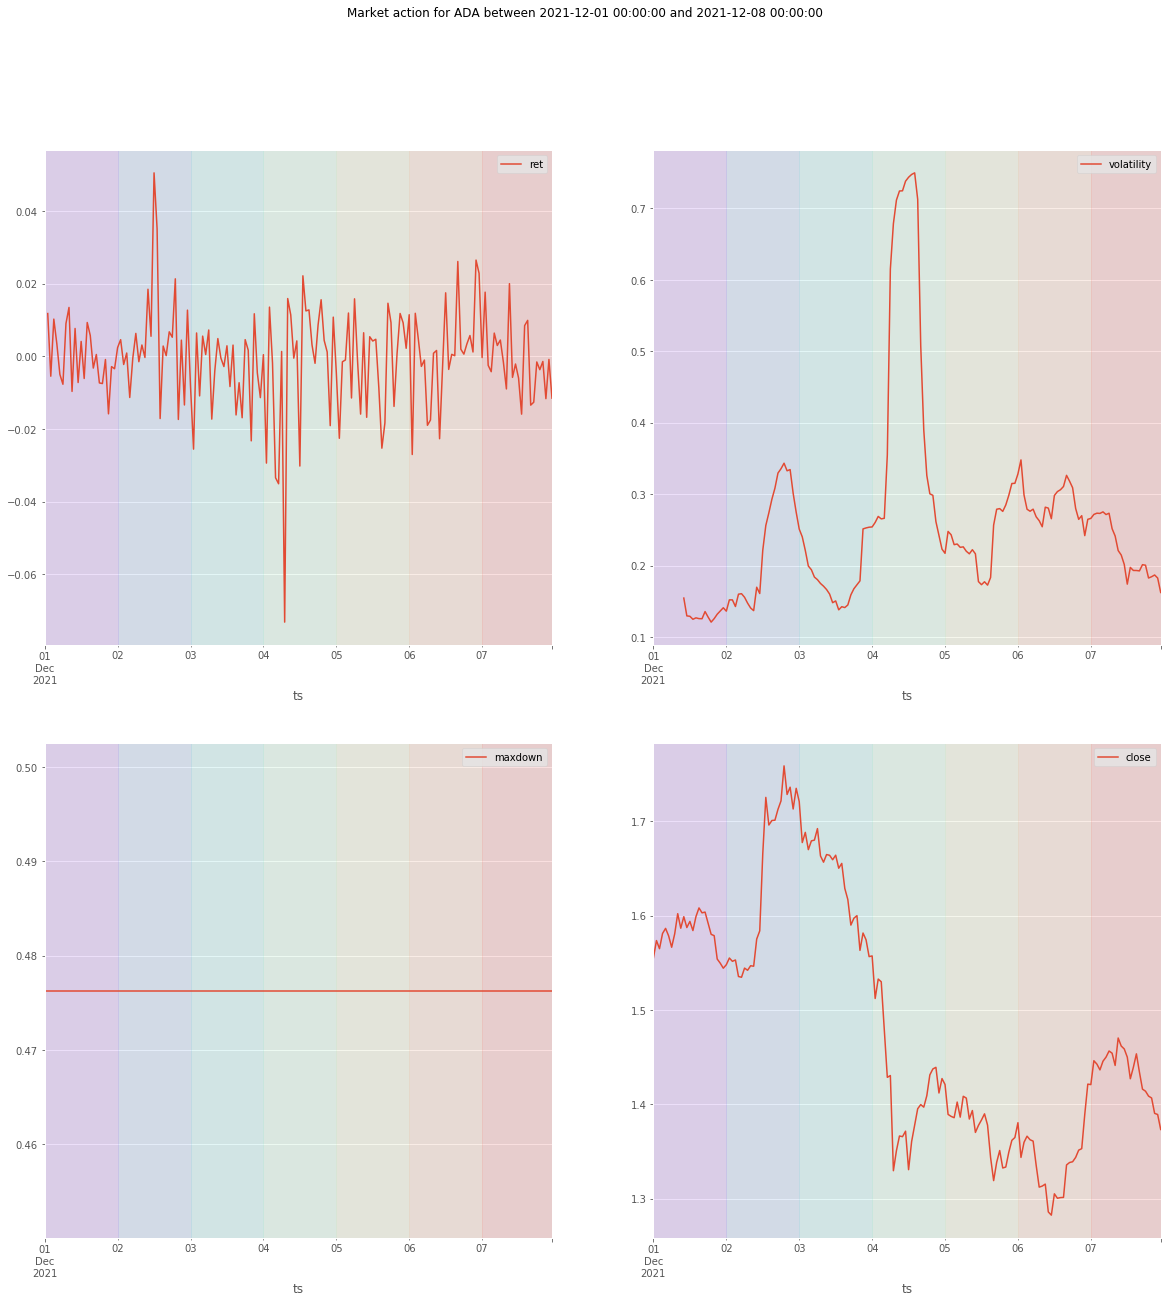

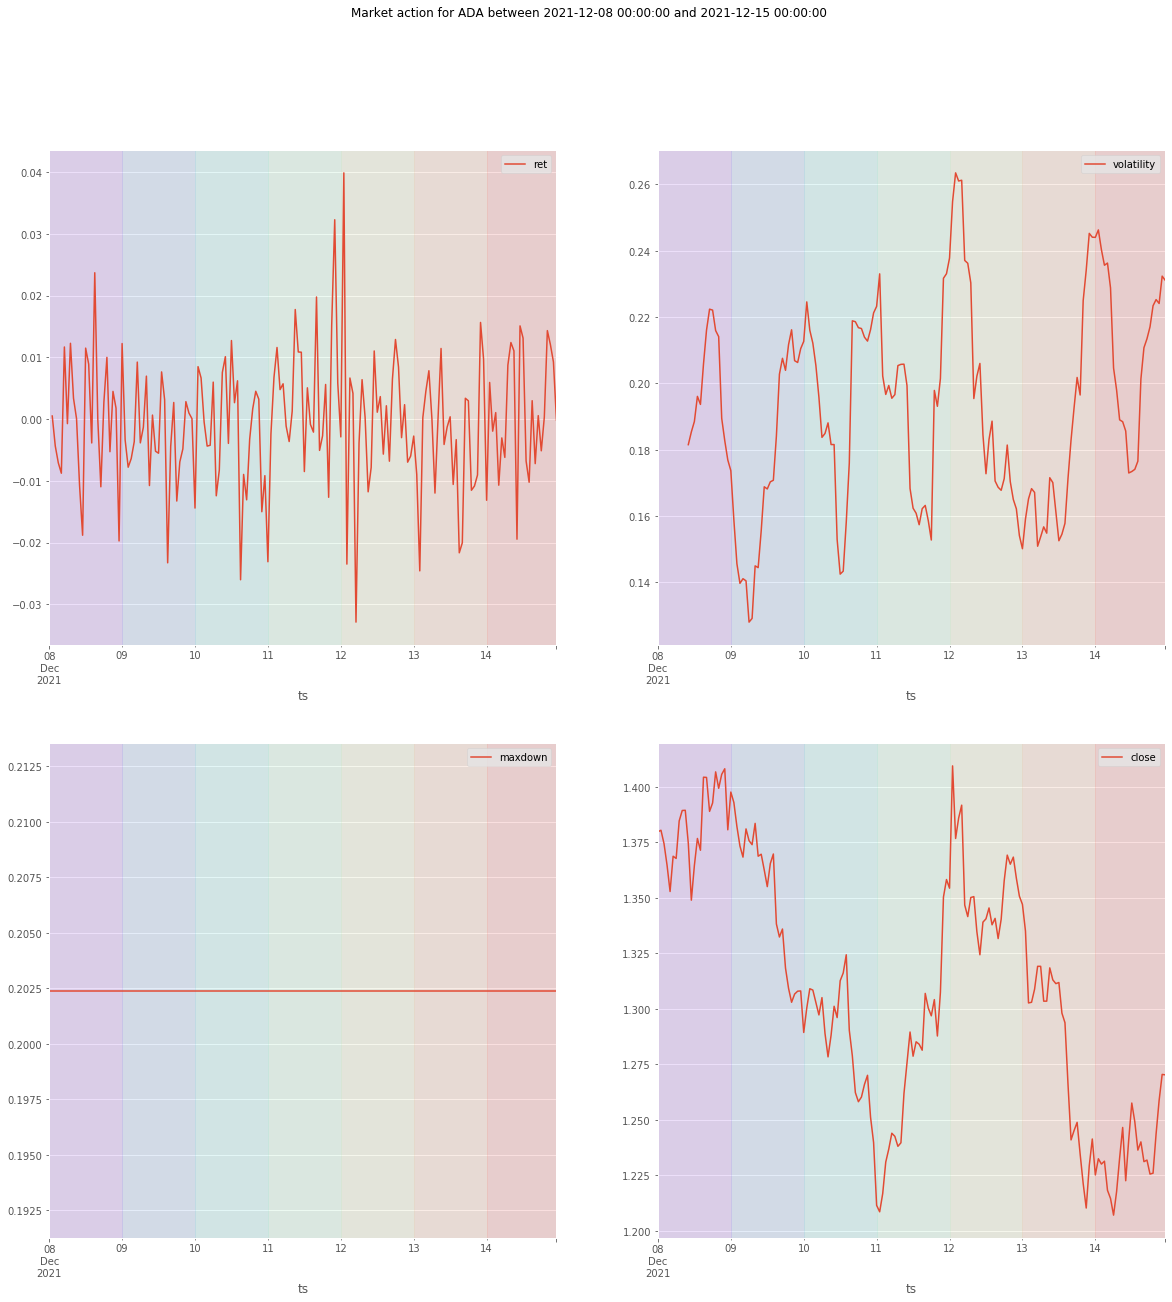

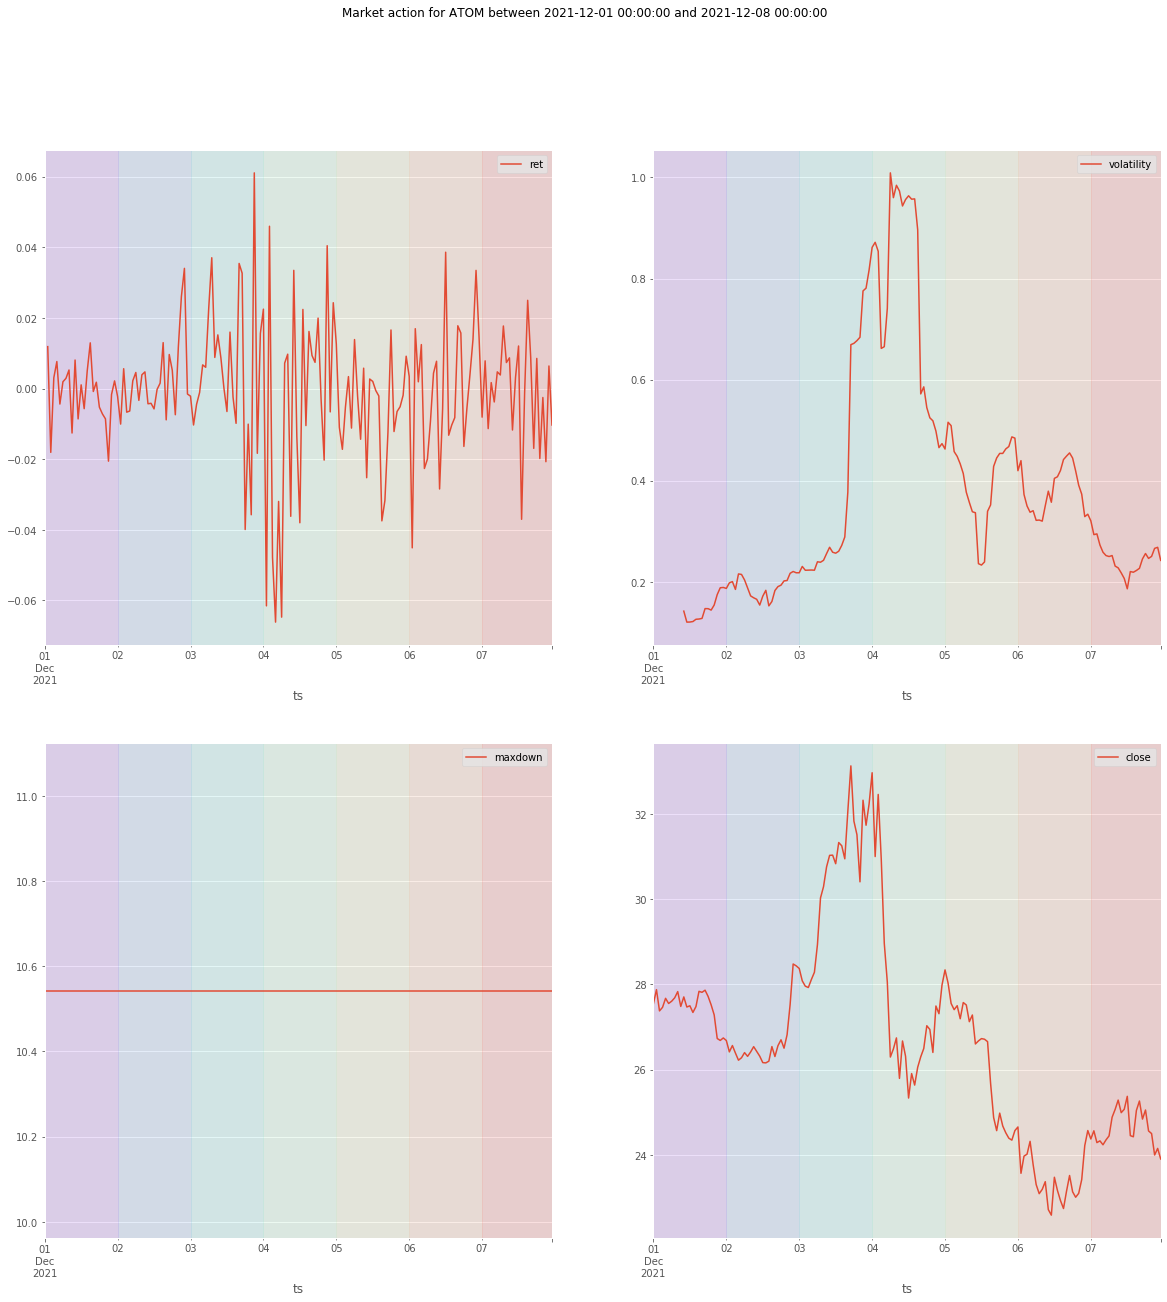

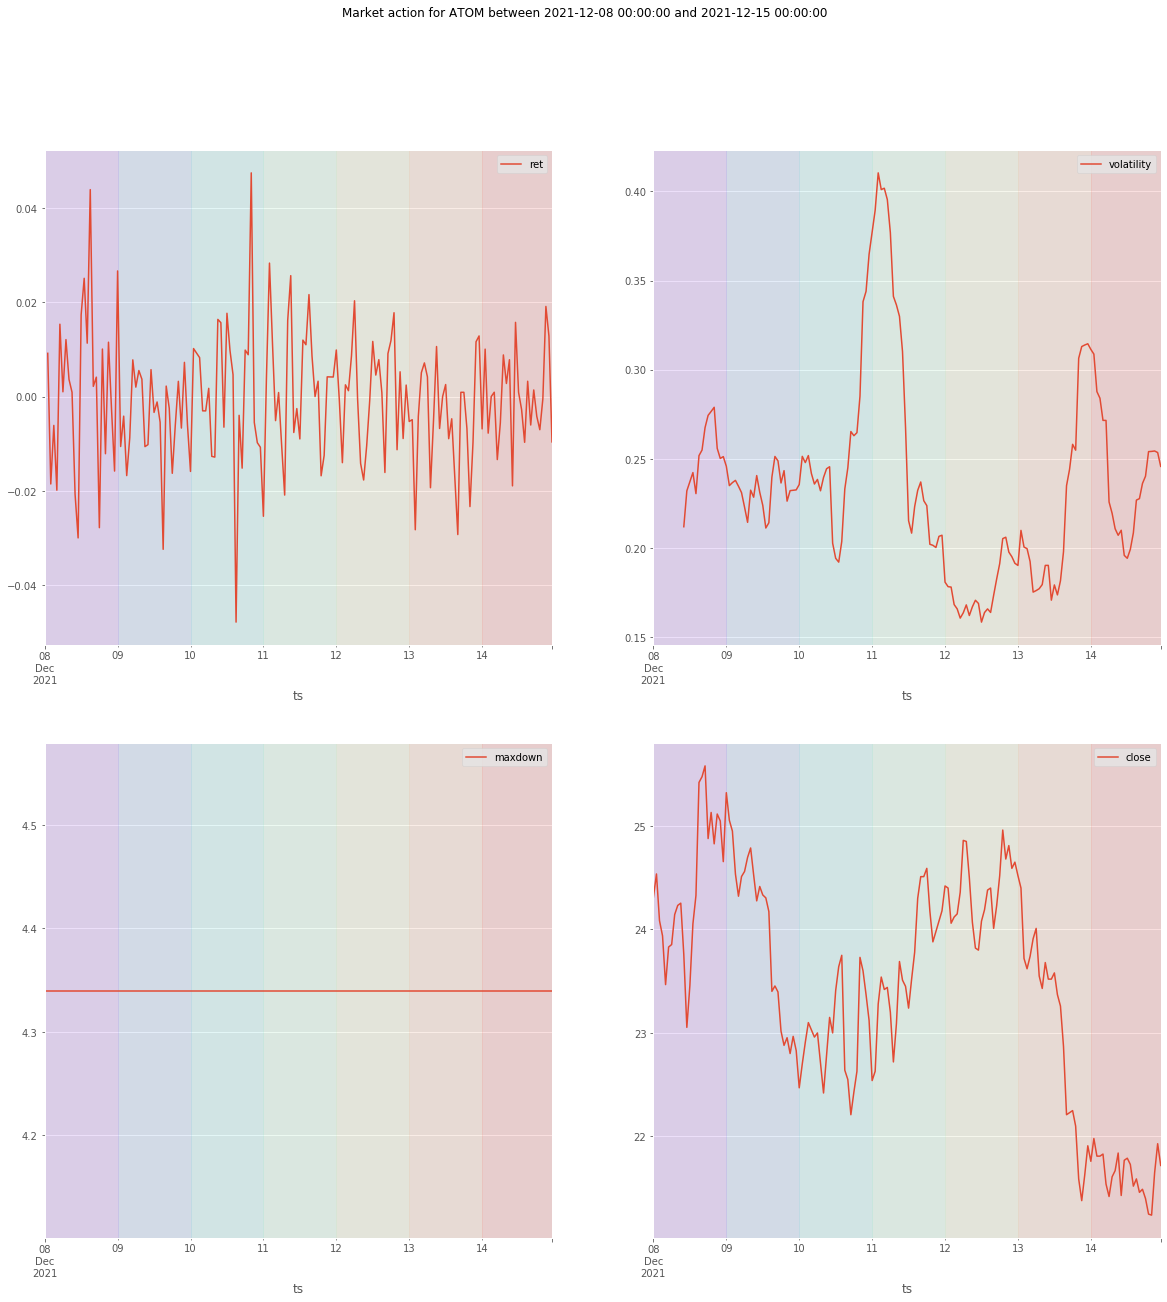

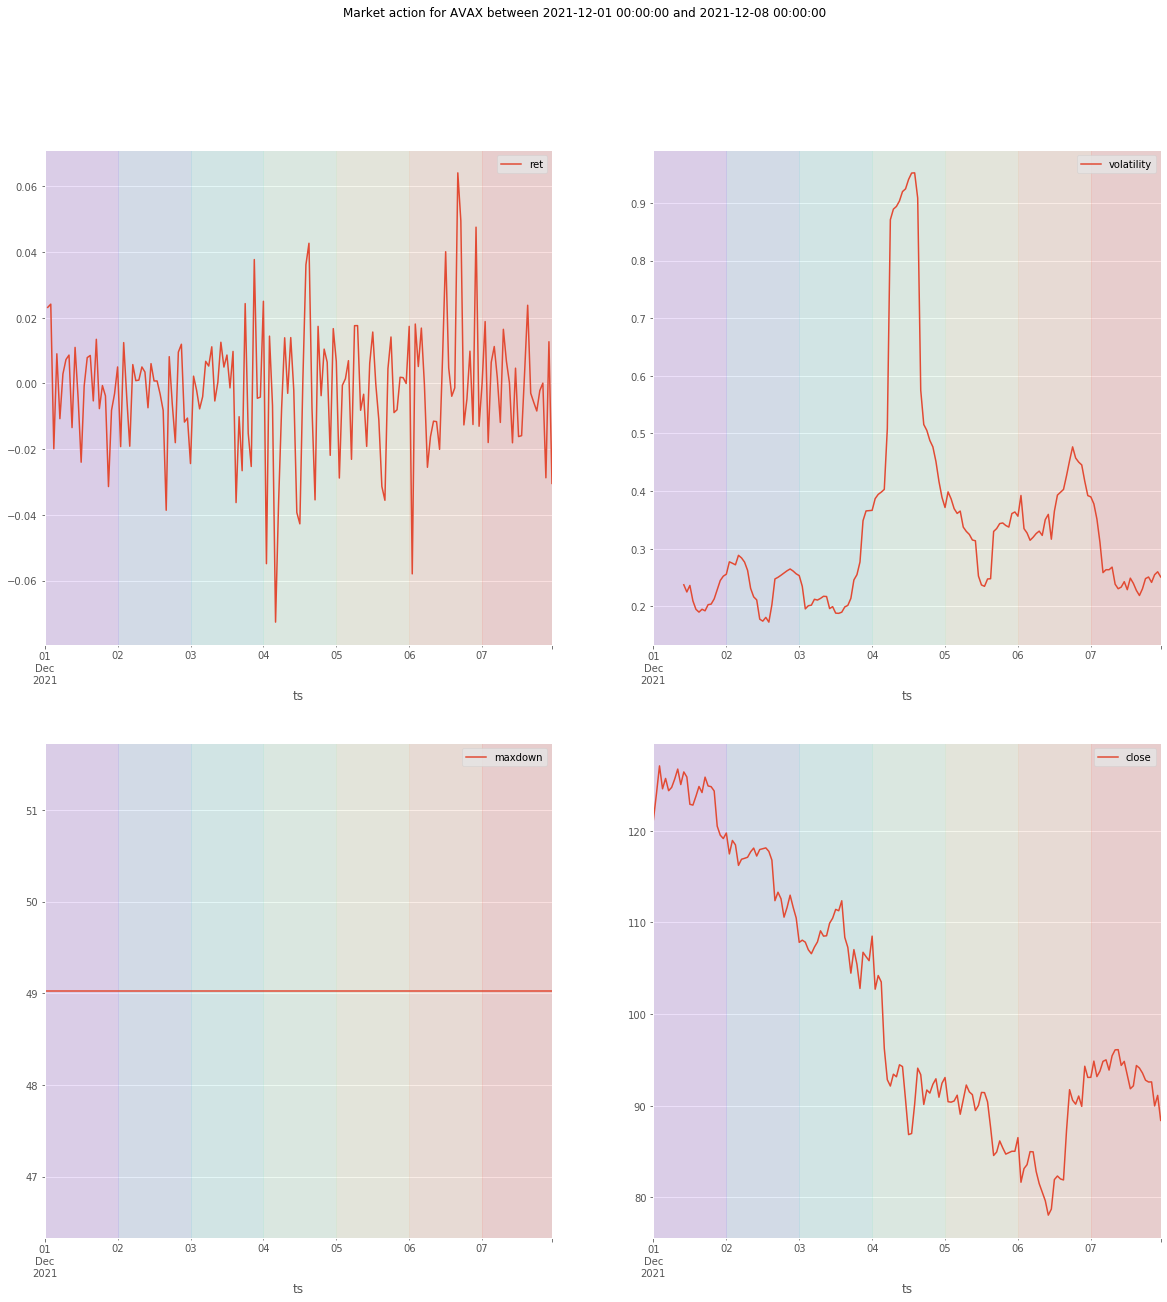

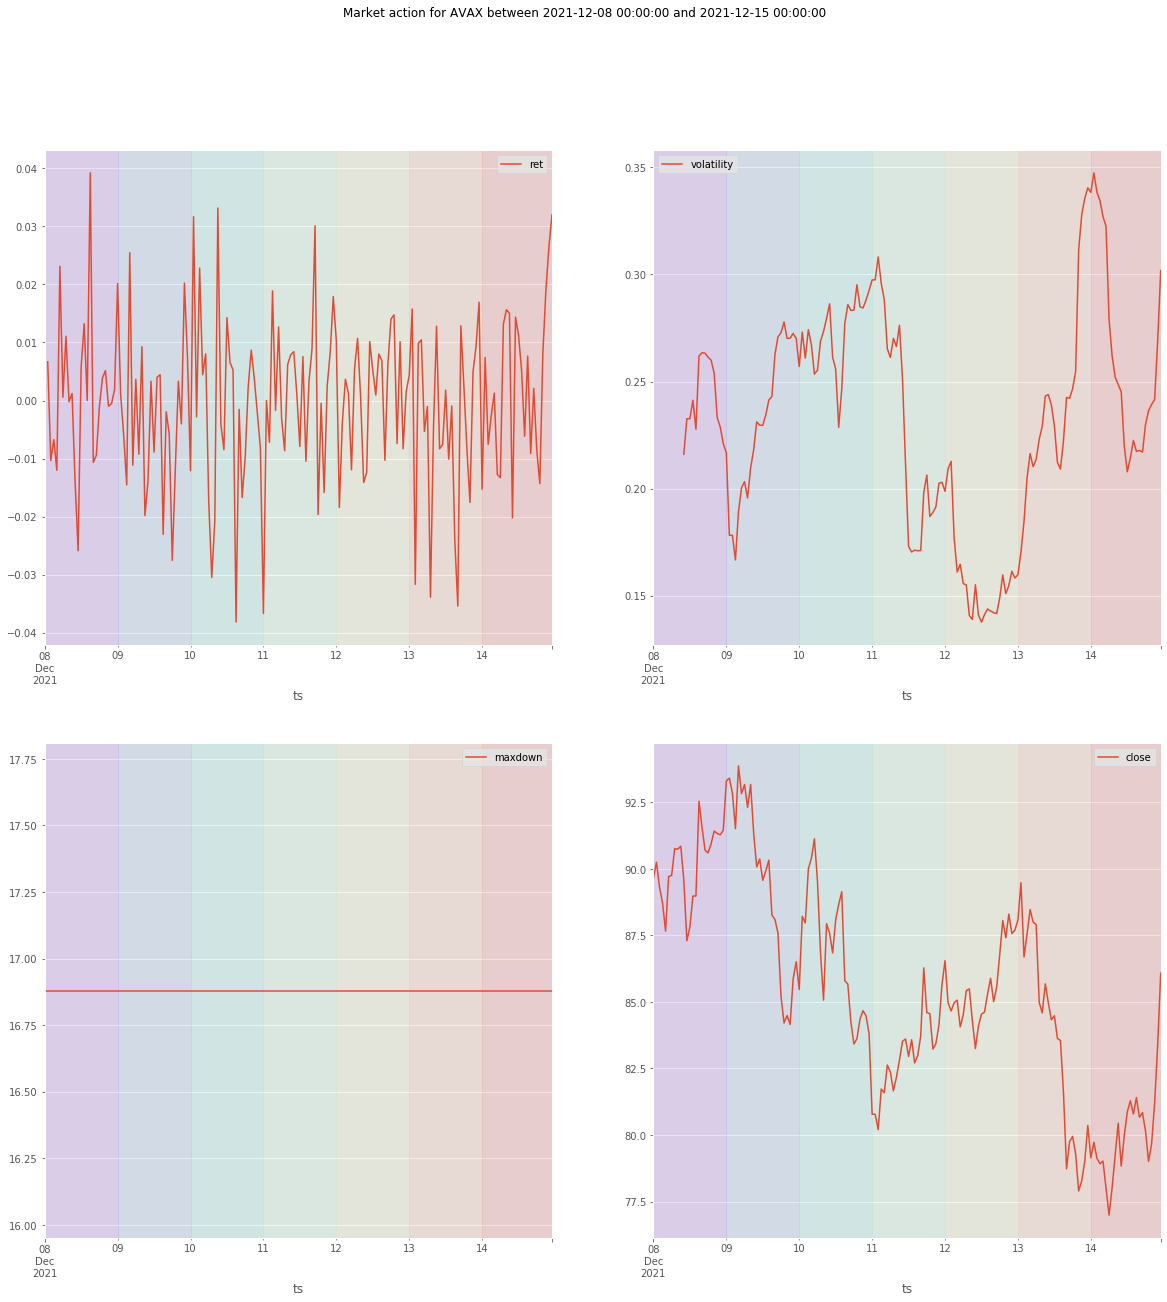

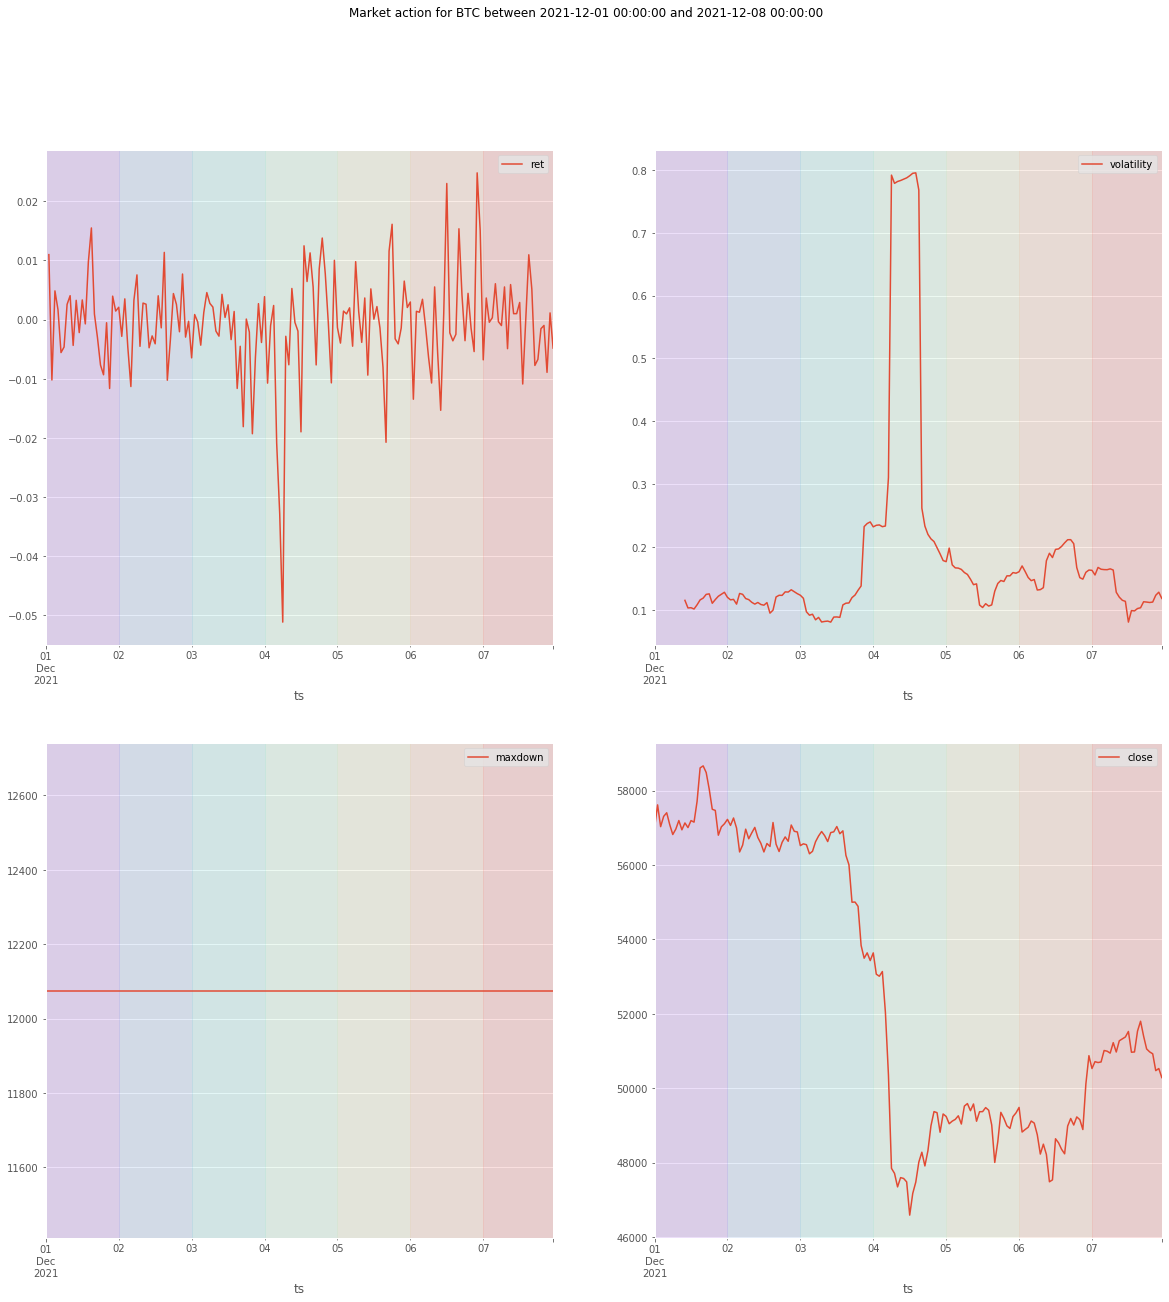

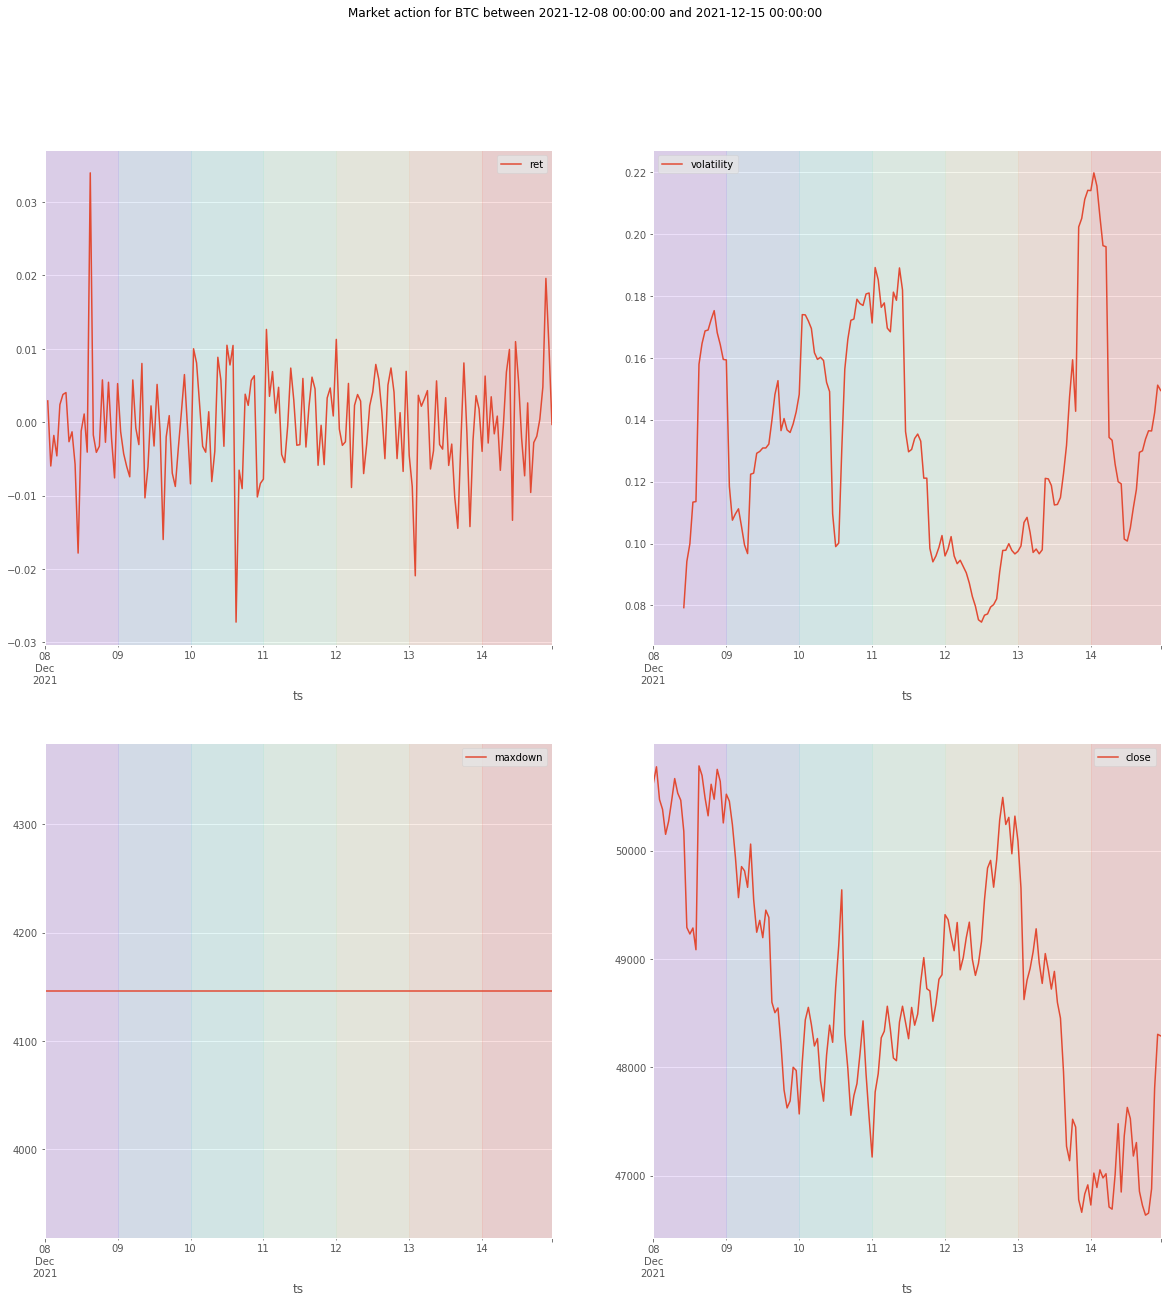

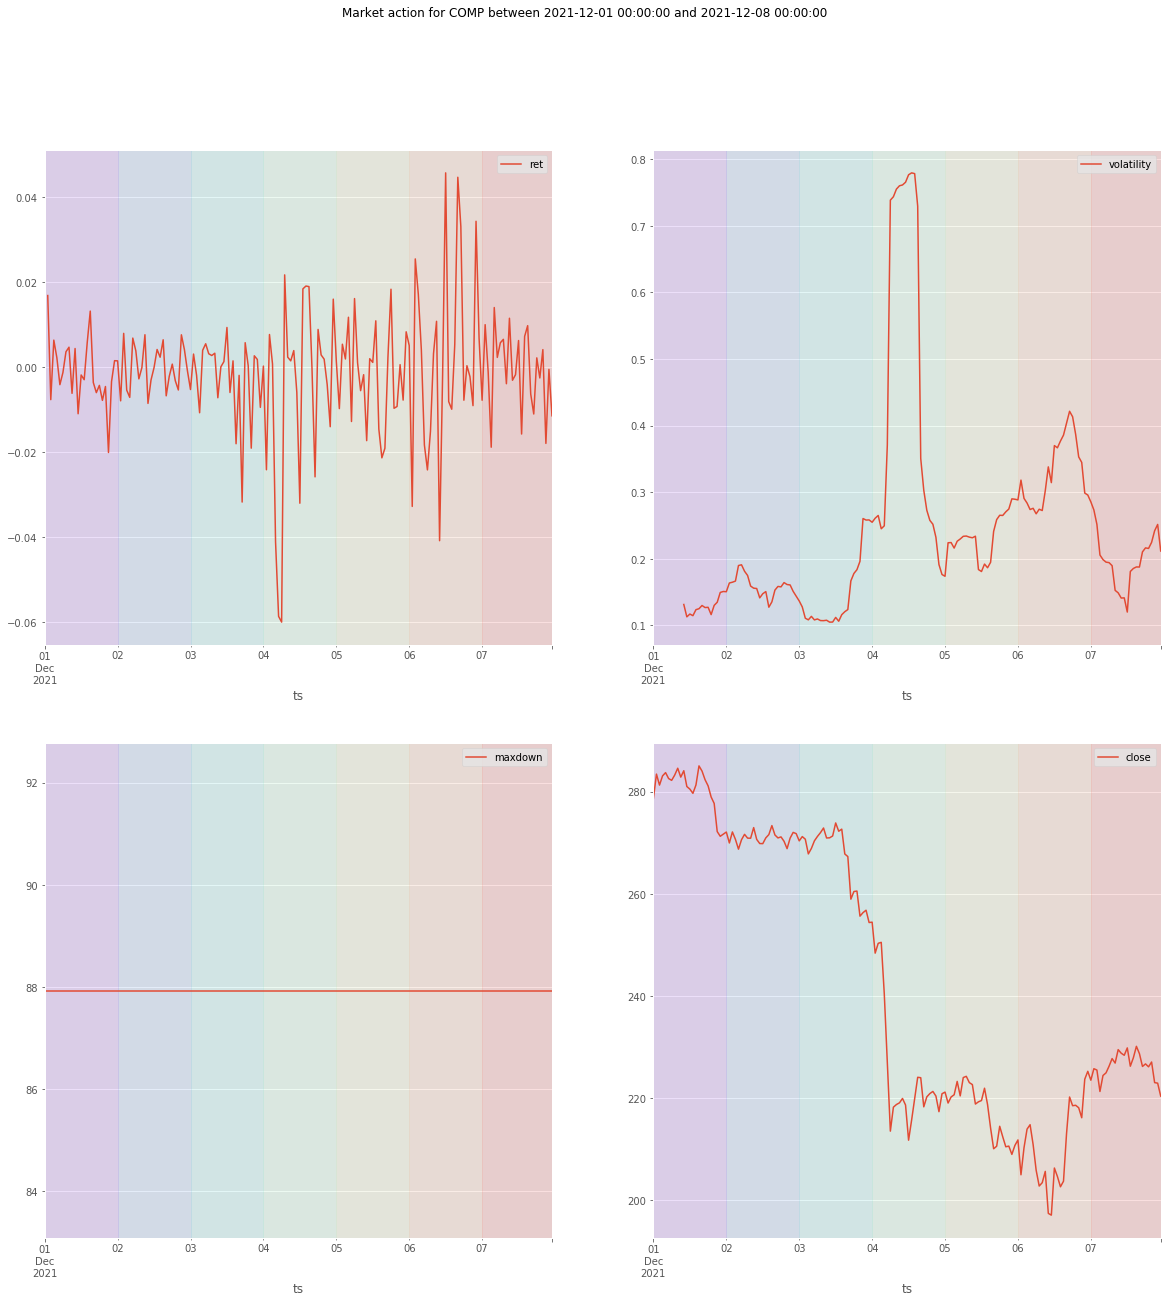

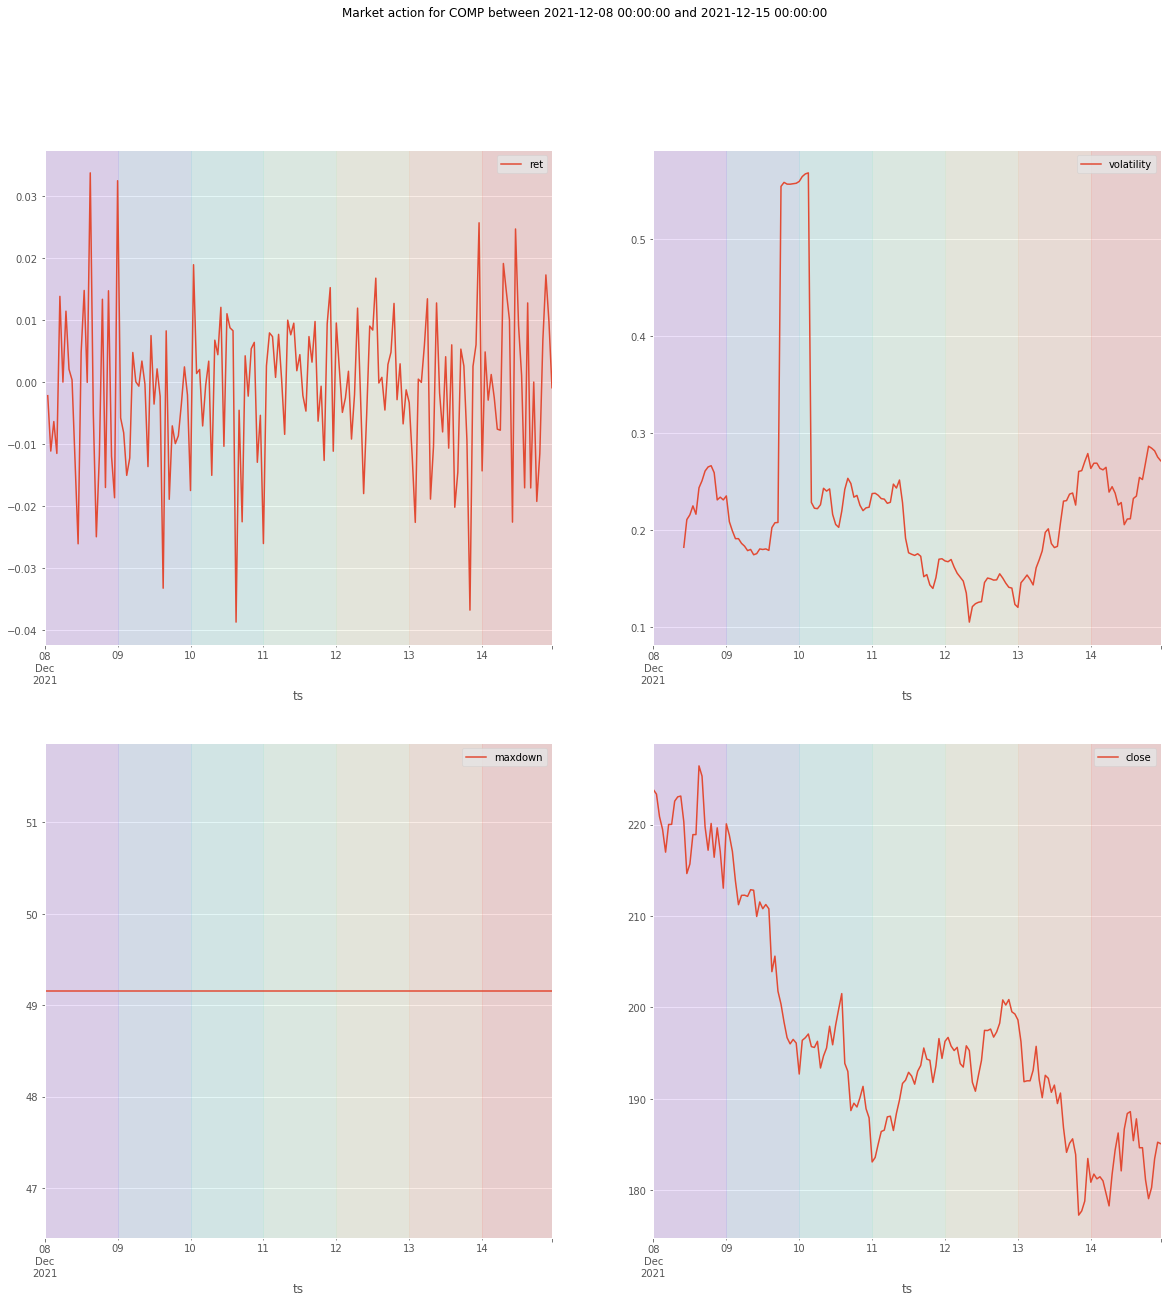

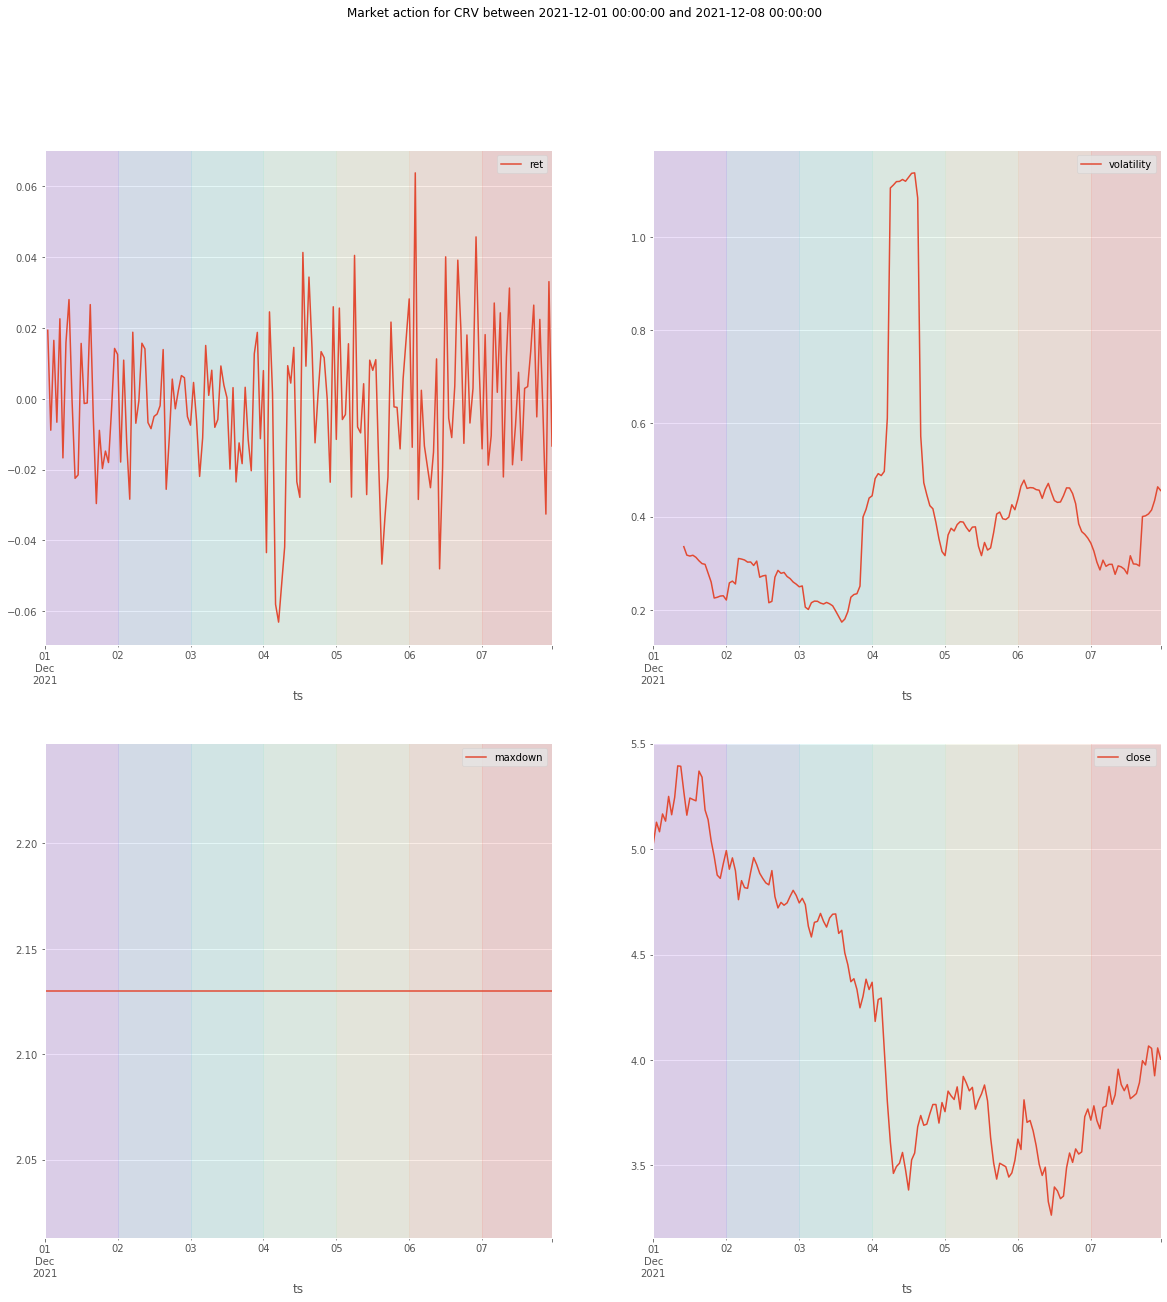

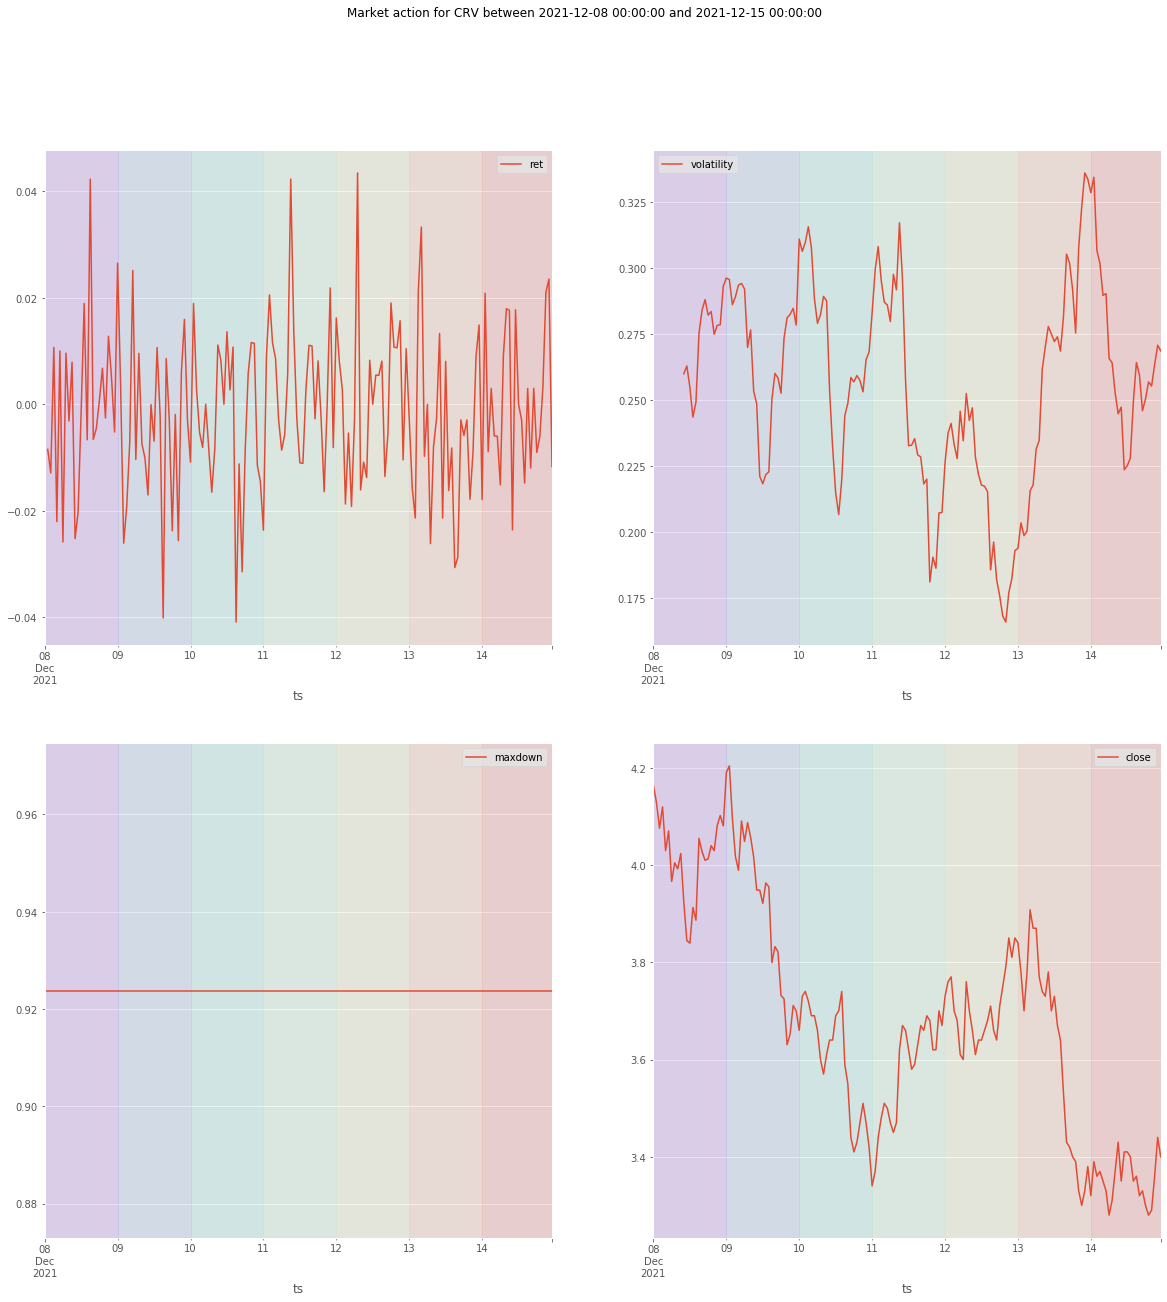

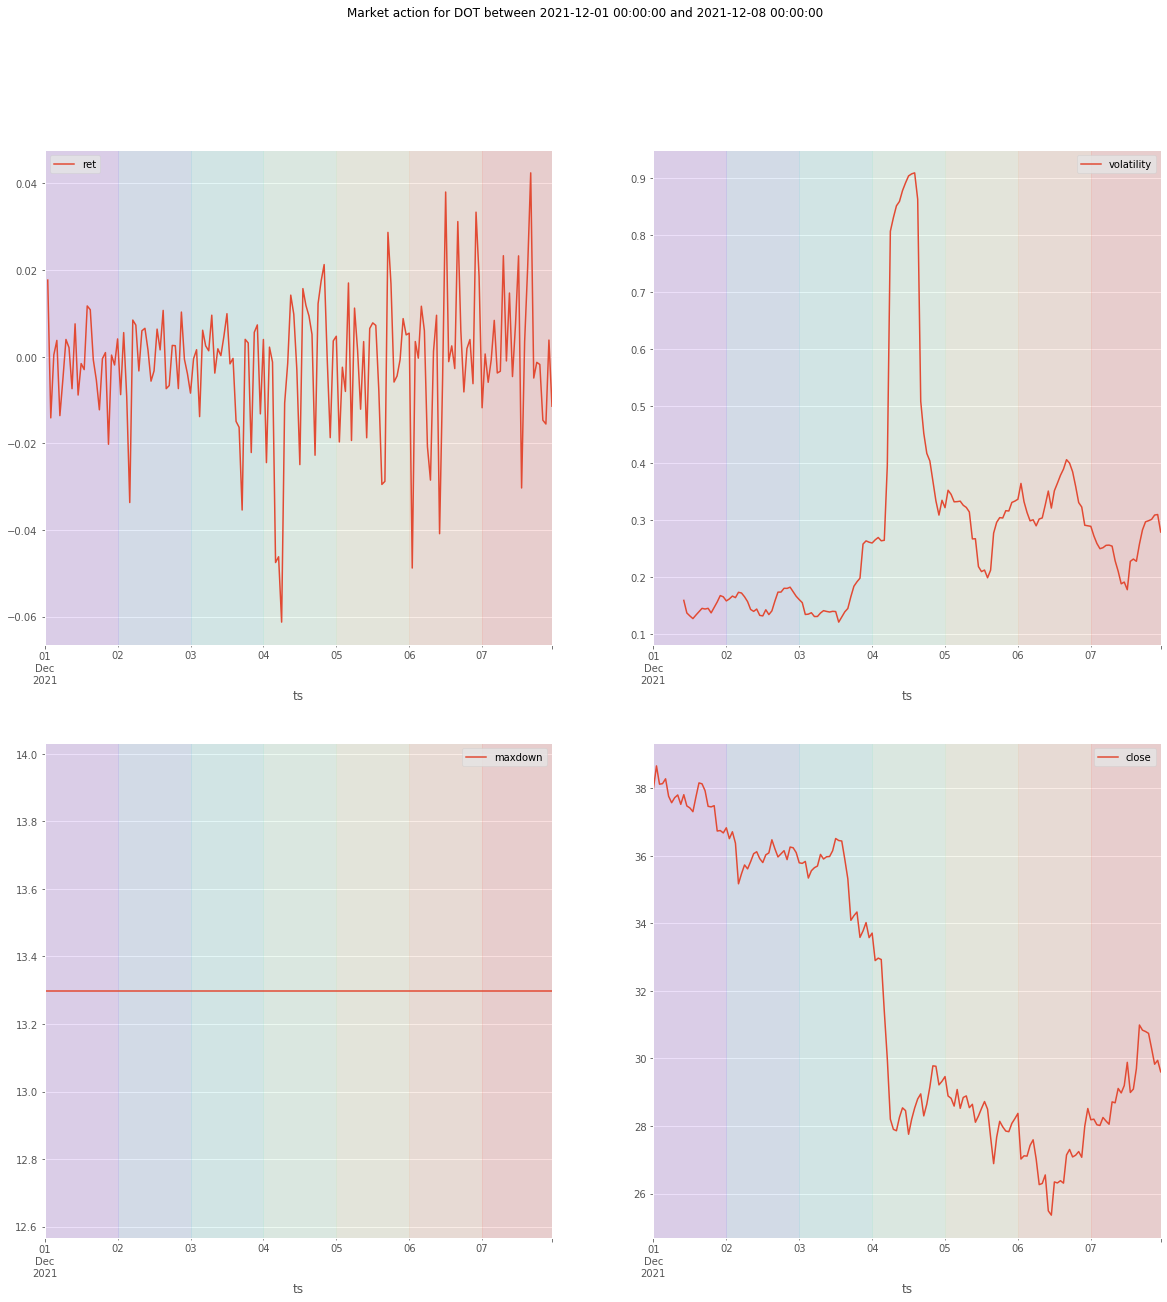

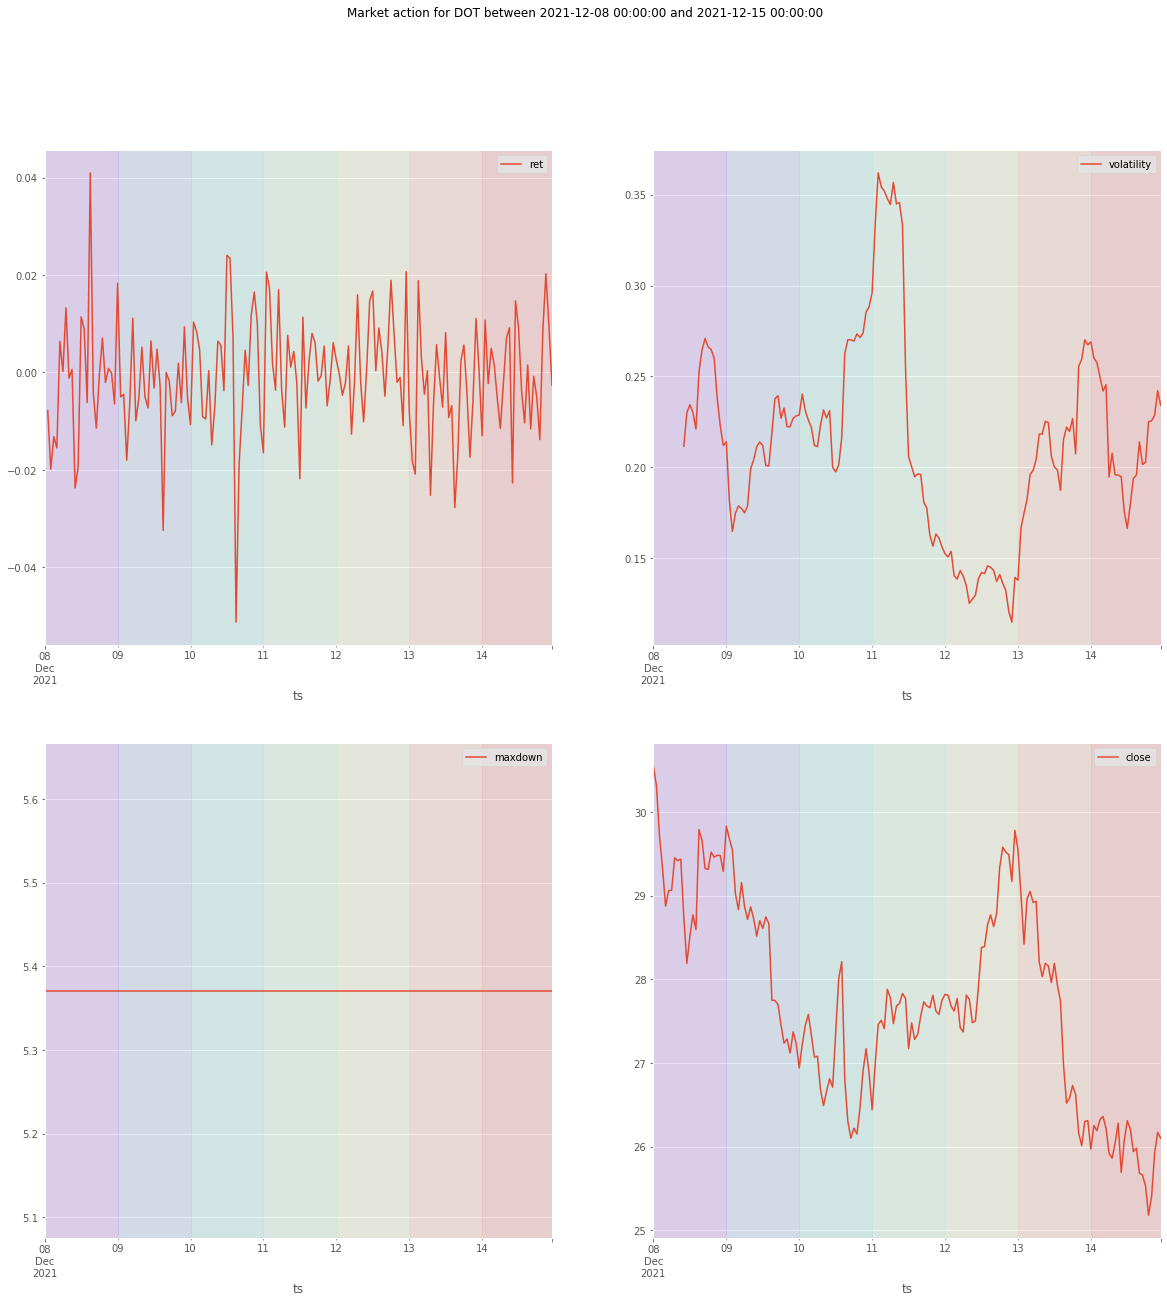

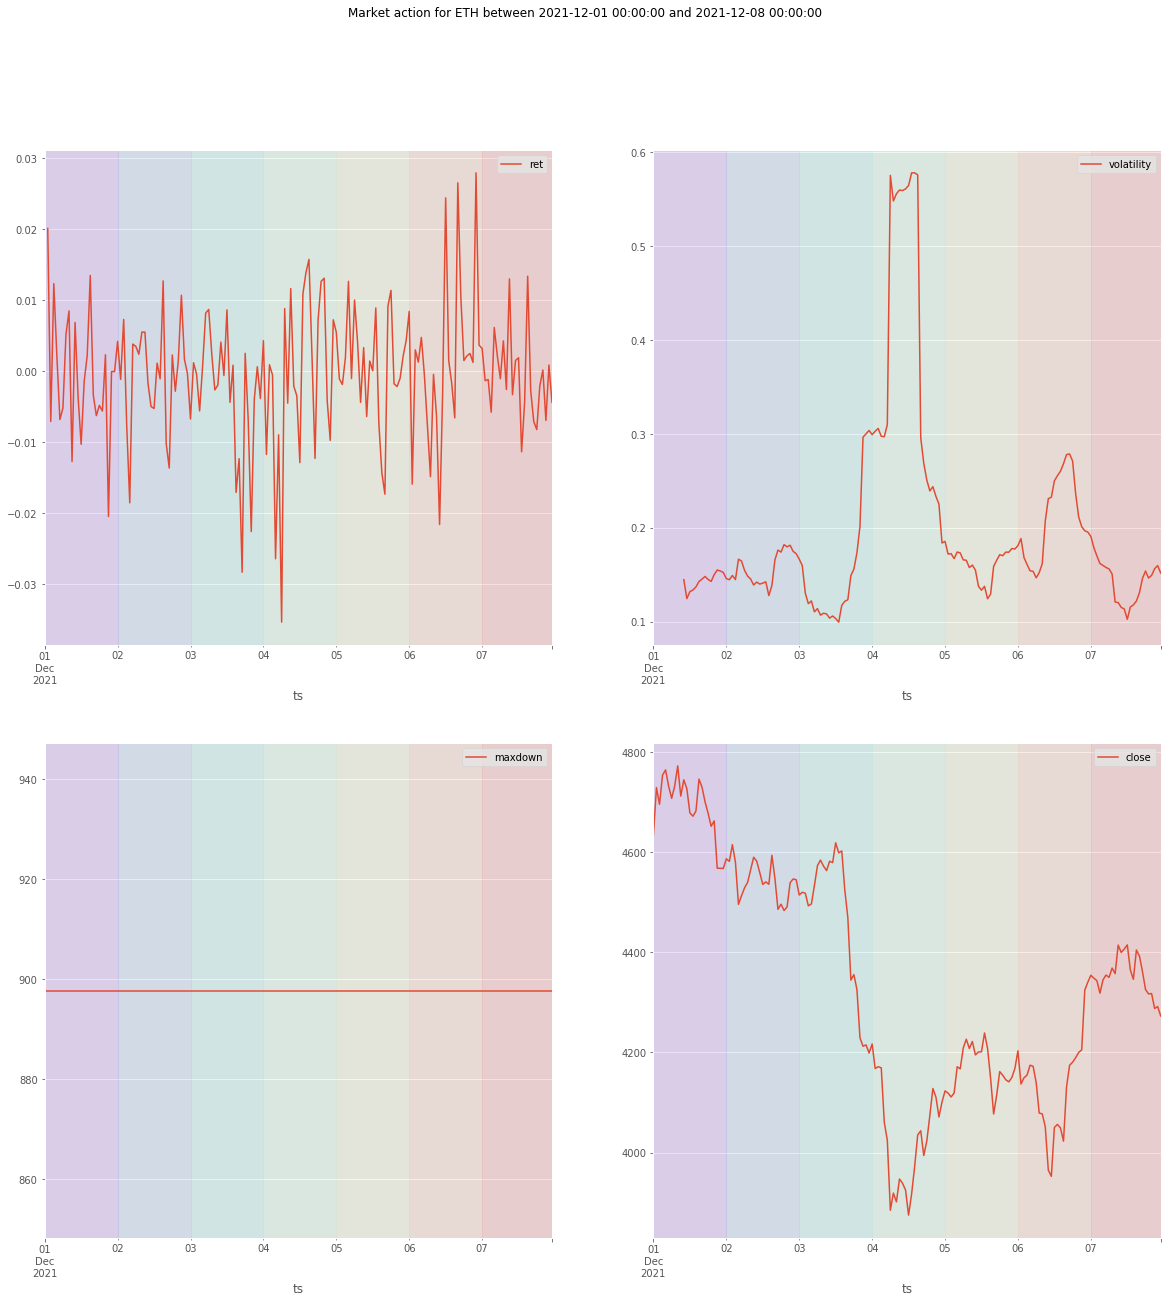

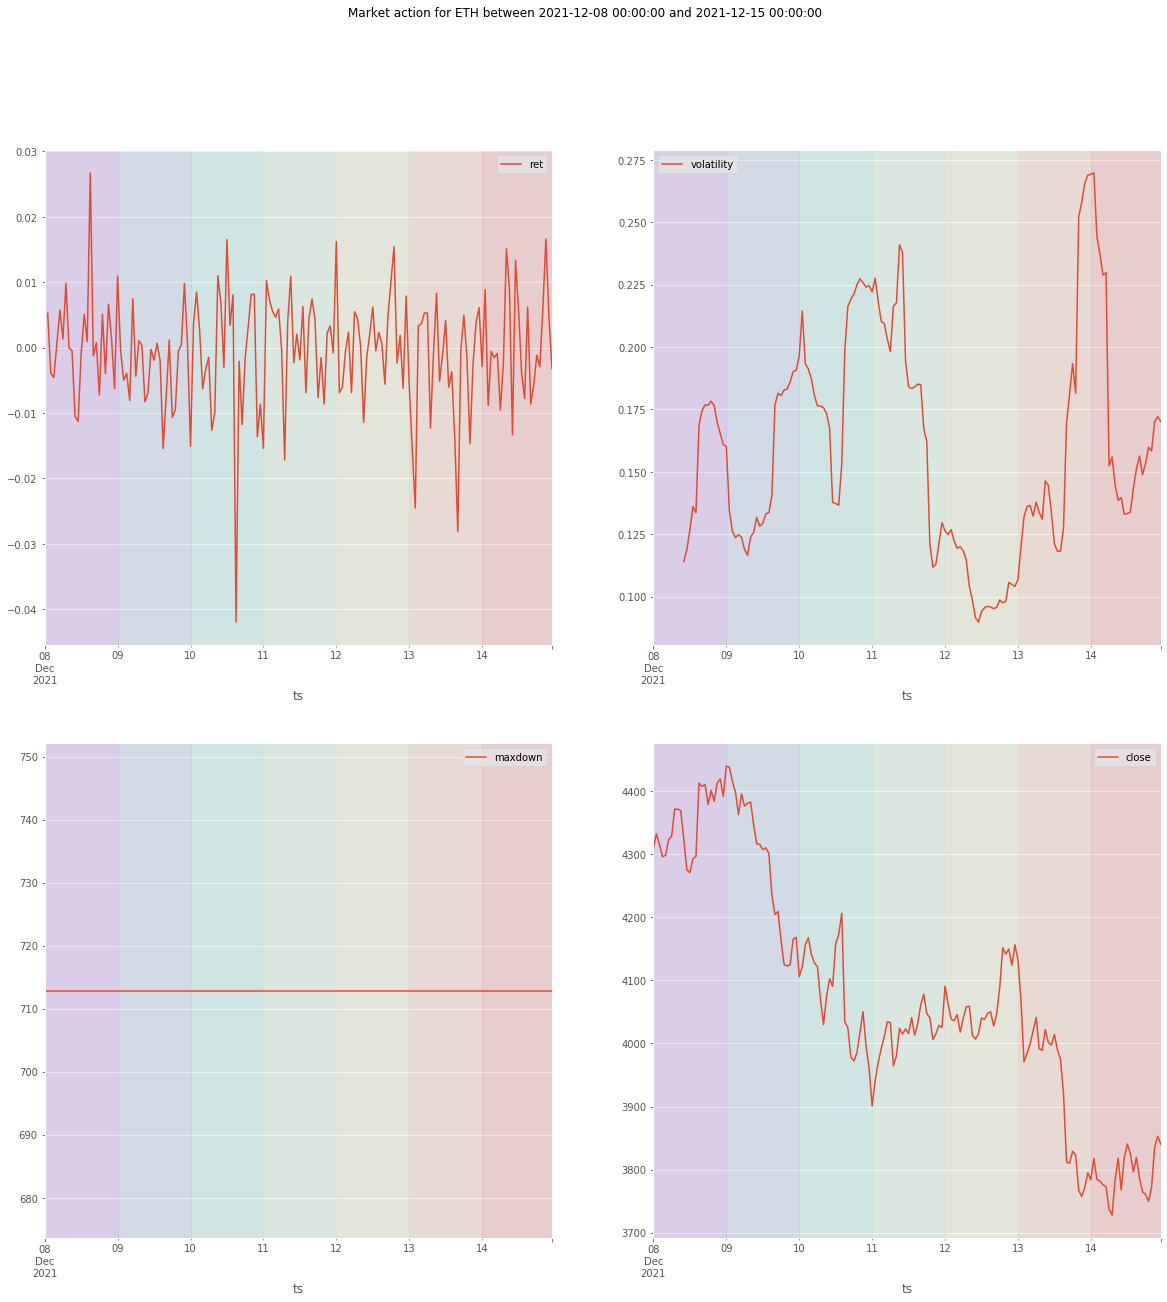

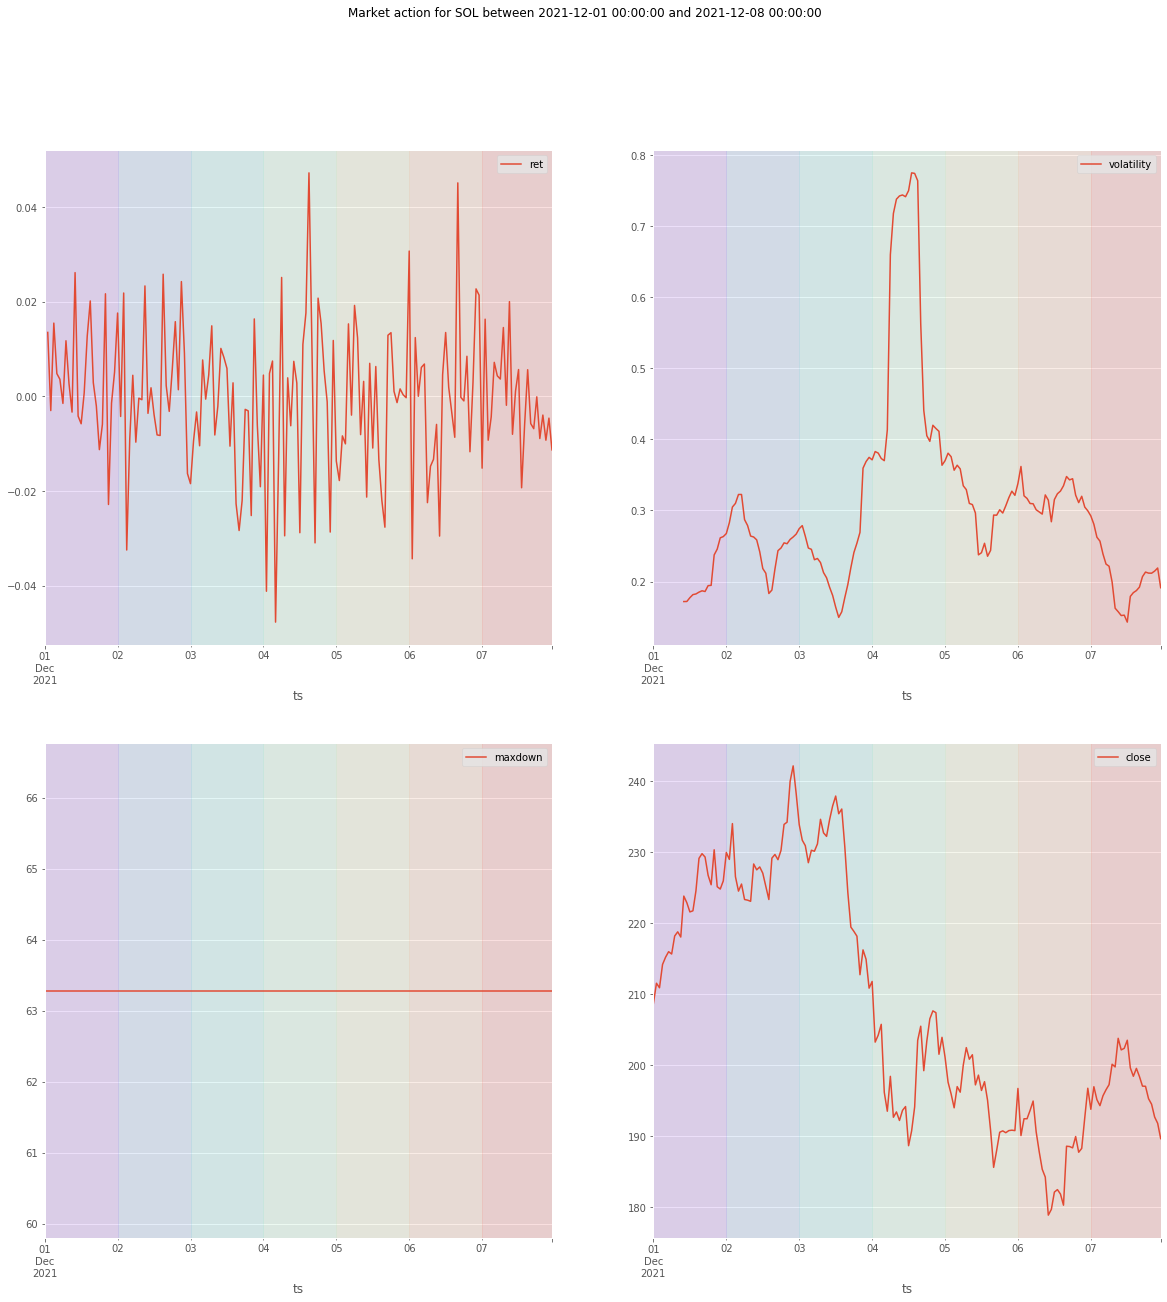

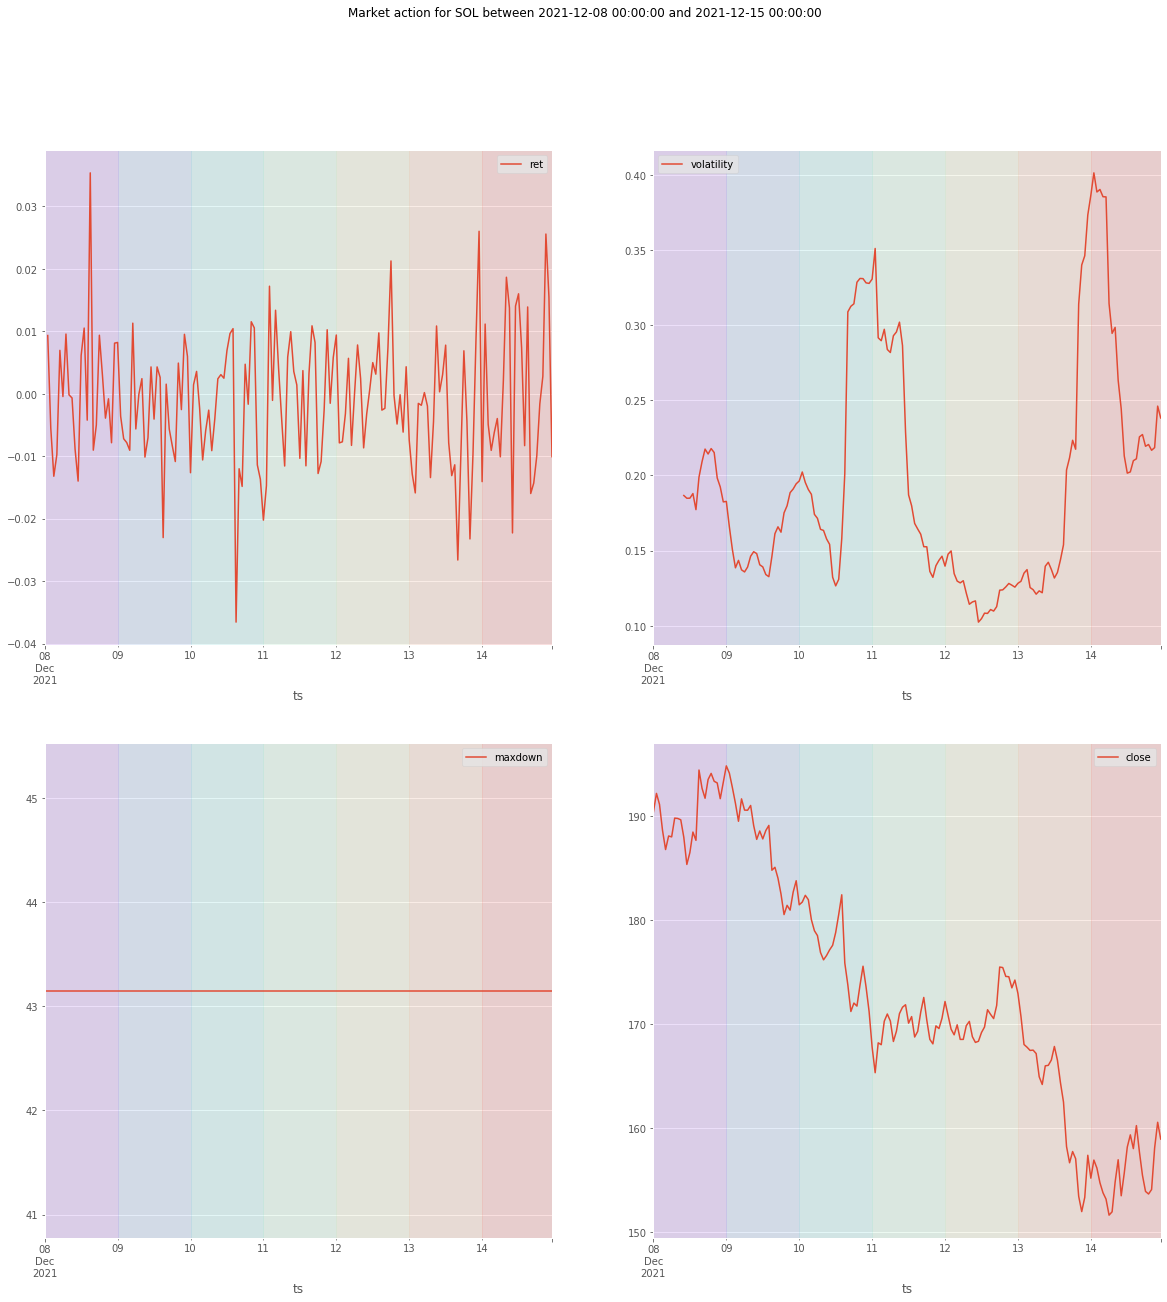

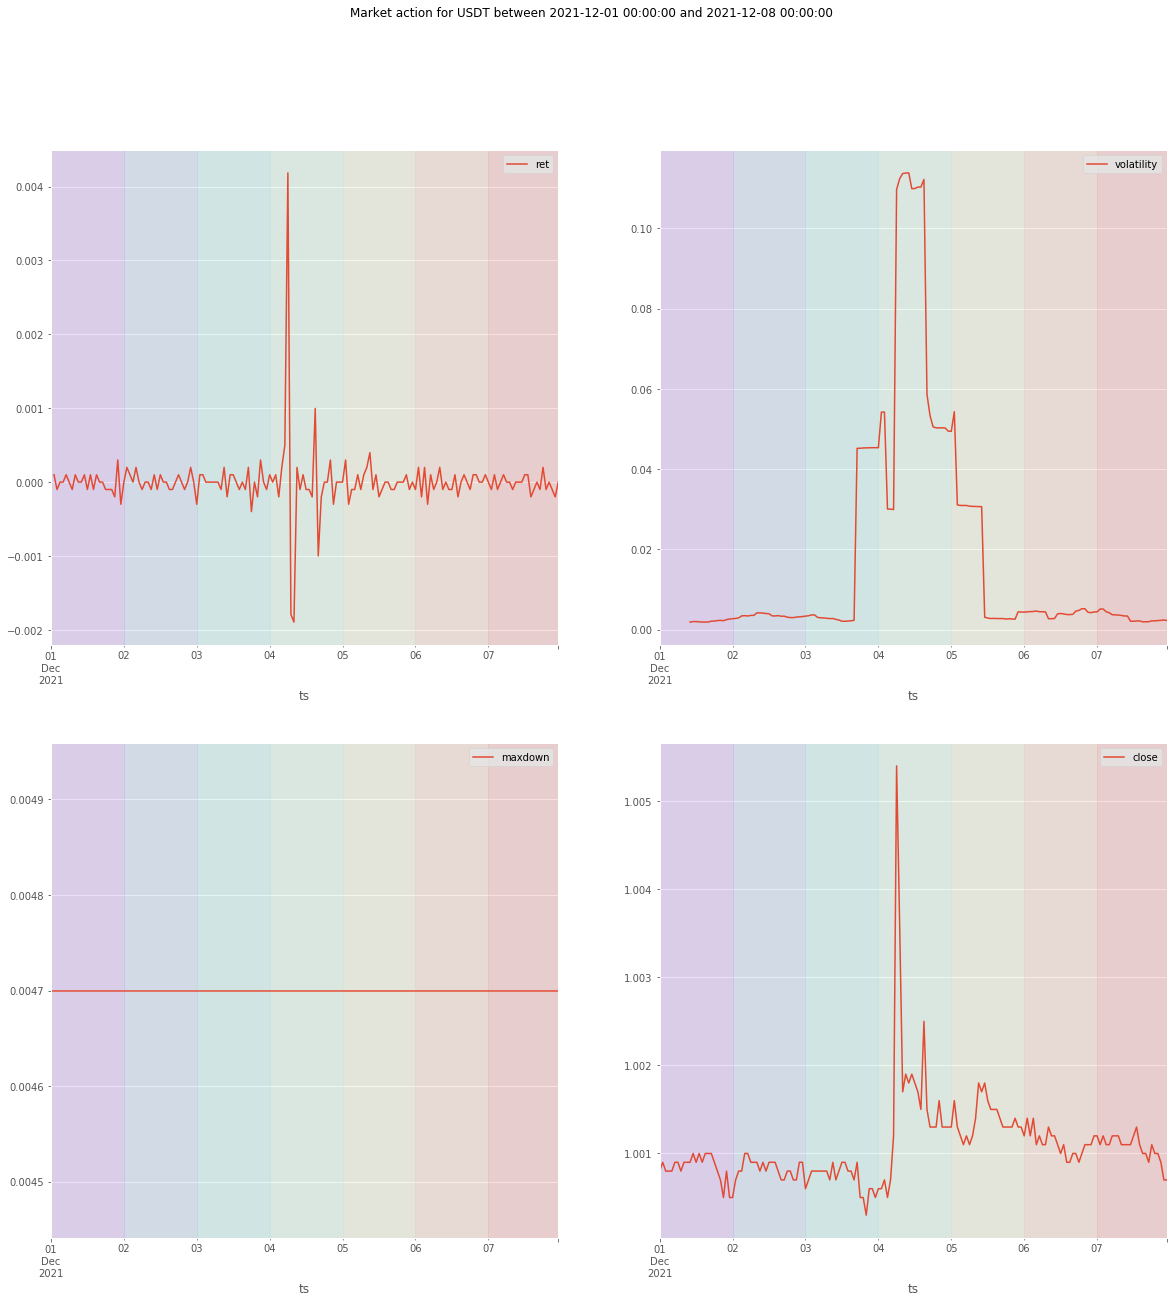

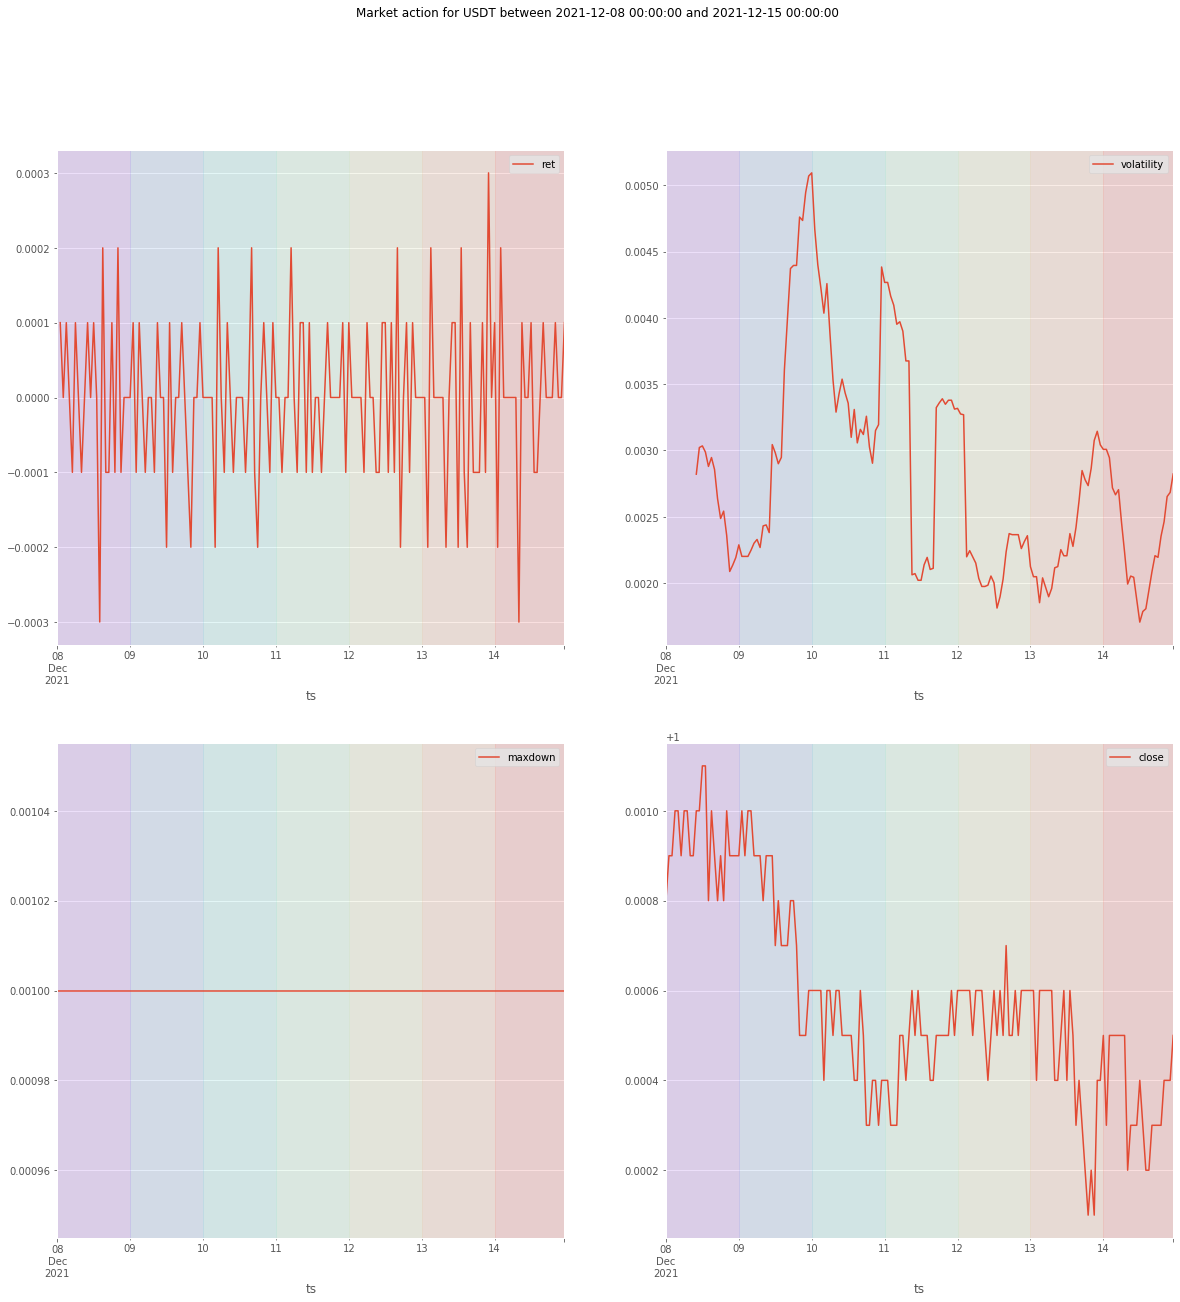

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [60]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]